<font face="Times New Roman" size=5>
<div dir=rtl align="center">

<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Introduction to Machine Learning
</font>

<hr/>
<font color="#80a080" size=5>
Assignment 3: Regression  
<br>
</font>
<font size=5>
Instructor: Dr. S. Amini
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<hr>
</div></font>

> - Full Name: **[Mahdi Mansouri]**
> - Student ID: **[402104499]**

#### <span style="color:#ff6666">**Attention: There are questions in the notebook that require your answers. Please make sure to answer them. Good luck!**</span>



# Q1: Linear Regression

As you have seen previously in the course, linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to identify a linear relationship that best predicts the dependent variable based on the values of the independent variables. In this part we are going to implement Linear Regression in different ways with Python:

* Manual with Gradient Descent
* Using Scipy
* Using Scikit-Learn
* Using Seaborn

## Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading our housing dataset
We will load our data on house sales in King County to predict house prices using simple (one input) linear regression. We want to be able to predict Y which is our price variable.

In [2]:
dataset = pd.read_csv('kc_house_data.csv')
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'],  axis=1)

## Data Analysis
We can perform basic data analysis using `info`, `describe`, and `head`.

using pandas `.info()` we see we have 18 columns and 21613 records. Pretty much all the features given are already in numeric format.

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [3]:
columns = X.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#show first 5 records
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


`.describe` generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [6]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can alse compute correlation between variables and our predictor variable.

In [4]:
dataset = dataset.drop(['id', 'date'], axis=1)
dataset.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


for gaining better insight, we can visualize the table above.

<Axes: >

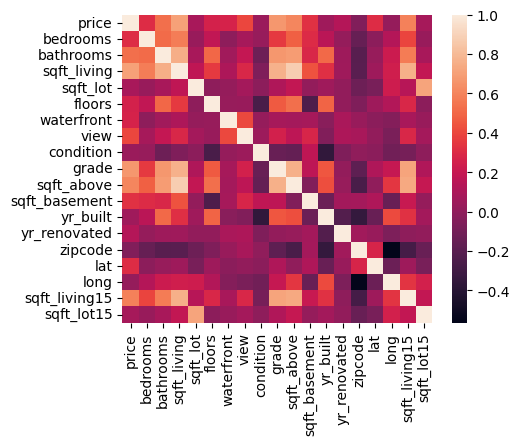

In [5]:
plt.subplots(figsize=(5,4))
sns.heatmap(dataset.corr())

Now that we have gained some insight about our dataset, we can implement linear regression.

## Simple Linear Regression
We will start with **Simple Linear Regression** since it is easier to understand and visualize before moving to **Multiple Linear Regression**. Though, the concepts overall are similar and the libraries we will be using are actually designed to handle both without distinction. Simple Linear Regression is easier to plot and visualize so we will start with that.

It is **Simple Linear Regression** when we have one dependent variable (feature) and one independent variable. Here we will pick `sqft_living` as our independent variable `X`.

Our goal is to estimate $\hat{y} = x \theta_1 + \theta_0 $, where $ \theta_1 $ is our coefficient and $ \theta_0 $ is our intercept. To estimate $ \hat{y} $ we need to find a function such as $ \hat{y} = h(x) = x \theta_1 + \theta_0 $.

We first start by creating our `x` and `y` variables. Then plotting to gain an intuition on how the data looks like.


In [6]:
x = X[['sqft_living']]
y = Y

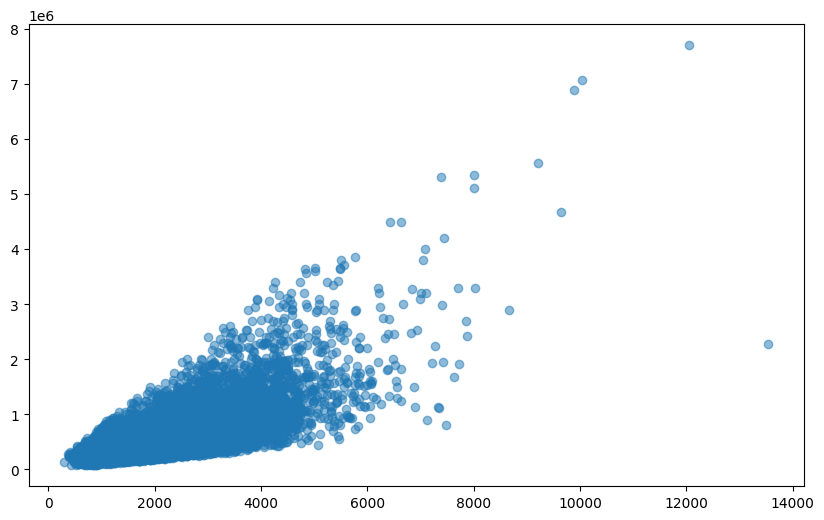

In [7]:

plt.figure(figsize=(10, 6)) 
plt.scatter(x['sqft_living'], y['price'], alpha=0.5)  
plt.show()

## Simple Linear Regression Implementations:

### 1. Using `seaborn.regplot()` and `scipy.stats`

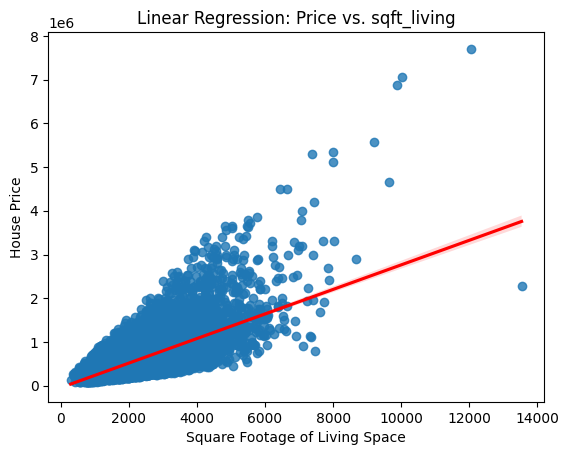

In [8]:

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x['sqft_living'], y['price'].values.flatten())


sns.regplot(x=x['sqft_living'], y=y['price'], line_kws={'color': 'red'})
plt.xlabel('Square Footage of Living Space')
plt.ylabel('House Price')
plt.title('Linear Regression: Price vs. sqft_living')
plt.show()

In [9]:
print("Slope (θ1):", slope)
print("Intercept (θ0):", intercept)

Slope (θ1): 280.6235678974483
Intercept (θ0): -43580.74309447408


In [10]:
r_squared = r_value ** 2
print(f"Model Accuracy (R²): {r_squared:.4f}")
print("Standard error:", std_err)

Model Accuracy (R²): 0.4929
Standard error: 1.9363985519989133


### 2. Manual Method : Gradient Descent Implementation

complete the TODO parts to implement linear regression.

In [11]:
# do not change this cell
x = X[['sqft_living']]
y = Y
xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

In [12]:
def computeCost(x, y, theta):
    m = len(y)
    predictions = x.dot(theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error ** 2)
    return cost

In [13]:
def gradientDescent(x, y, theta, alpha, iterations):
    m = len(y)
    j_hist = []
    for _ in range(iterations):
        predictions = x.dot(theta)
        error = predictions - y
        gradient = (1/m) * x.T.dot(error)
        theta -= alpha * gradient
        j_hist.append(computeCost(x, y, theta))
    return theta, j_hist

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_scaled = scaler.fit_transform(xg[:, 1].reshape(-1, 1))
xg[:, 1] = feature_scaled.flatten()

In [15]:
initial_theta = np.zeros((2, 1))
alpha = 0.1  
iterations = 1000

theta, j_hist = gradientDescent(xg, yg, initial_theta, alpha, iterations)

mu = scaler.mean_[0]
sigma = scaler.scale_[0]
theta0_original = theta[0][0] - (theta[1][0] * mu / sigma)
theta1_original = theta[1][0] / sigma

print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta1_original, theta0_original))

Theta found by Gradient Descent: slope = 280.6235678974482 and intercept -43580.74309447443


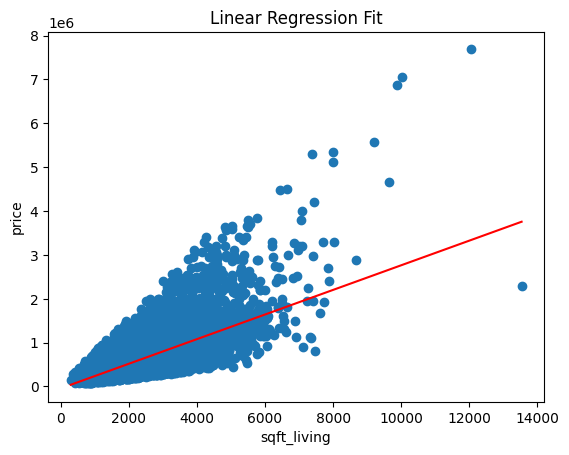

In [16]:
x_plot = np.linspace(X['sqft_living'].min(), X['sqft_living'].max(), 100)
x_plot_scaled = scaler.transform(x_plot.reshape(-1, 1))
x_plot_with_intercept = np.c_[np.ones(x_plot_scaled.shape[0]), x_plot_scaled]
y_plot = x_plot_with_intercept.dot(theta)

plt.scatter(X['sqft_living'], Y['price'])
plt.plot(x_plot, y_plot, color='red')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear Regression Fit')
plt.show()

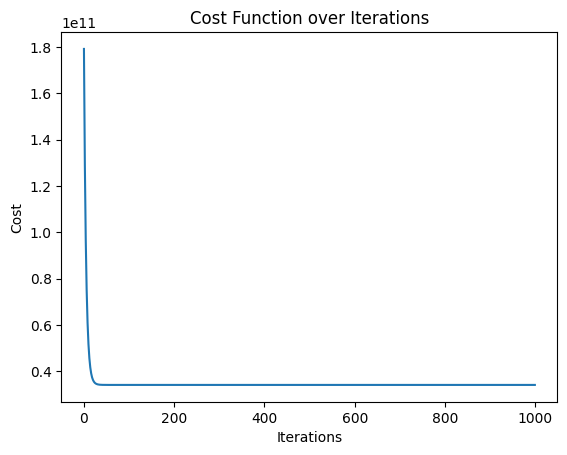

In [17]:
plt.plot(j_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

### 3. Implement using Scipy

Slope: 280.6236
Intercept: -43580.7431


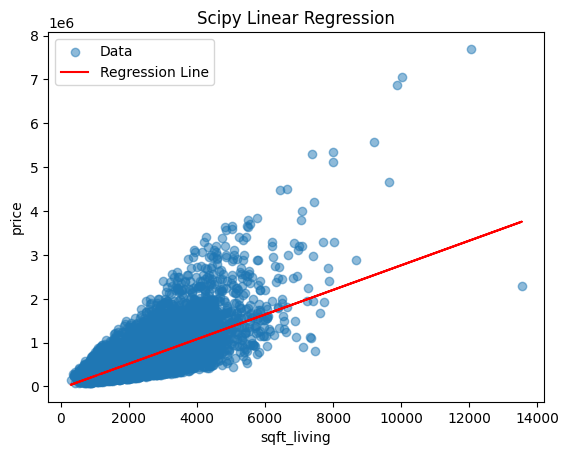

In [18]:
#TODO: implement linear regression using Scipy. train the model on your dataset. print the slope and intercept. plot the data points and predictions.
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x['sqft_living'], y['price'].values.flatten())

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

plt.scatter(x['sqft_living'], y['price'], alpha=0.5, label='Data')
plt.plot(x['sqft_living'], slope * x['sqft_living'] + intercept, color='red', label='Regression Line')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scipy Linear Regression')
plt.legend()
plt.show()

### 4. Implement using Scikit-Learn

Slope: 280.6236
Intercept: -43580.7431


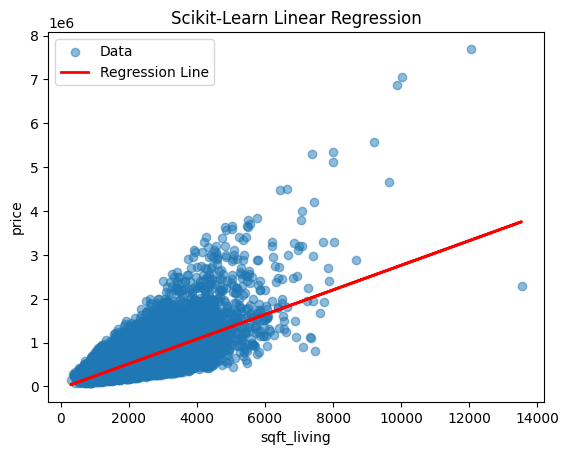

In [19]:
#TODO: implement linear regression using Scikit-Learn. train the model on your dataset. print the slope and intercept. plot the data points and predictions.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x[['sqft_living']], y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

plt.scatter(x['sqft_living'], y, alpha=0.5, label='Data')
plt.plot(x['sqft_living'], model.predict(x[['sqft_living']]), color='red', linewidth=2, label='Regression Line')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scikit-Learn Linear Regression')
plt.legend()
plt.show()

## Multiple Linear Regression
Multiple Linear Regression (MLR) is an extension of simple linear regression that models the relationship between two or more explanatory variables (features) and a dependent variable (target). 

Implement Multiple Linear Regression for this dataset.

R-squared: 0.6996

Theta coefficients (original scale after descaling):
bedrooms: -34964.0506
bathrooms: 40027.6441
sqft_living: 88.0217
sqft_lot: 0.1365
floors: 8133.2919
waterfront: 583563.8511
view: 52577.5049
condition: 27957.8394
grade: 92485.5358
sqft_above: 90.7965
sqft_basement: 61.1978
yr_built: -2524.2696
yr_renovated: 22.3246
zipcode: -563.9536
lat: 604997.3189
long: -221654.1694
sqft_living15: 29.6291
sqft_lot15: -0.3821
Intercept: 3743543.6860


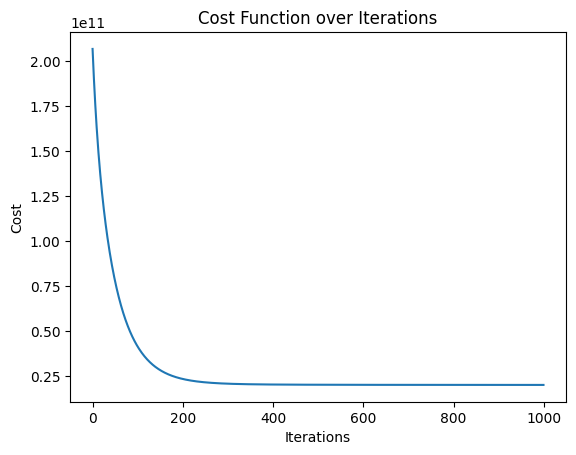

In [20]:
# Multiple Linear Regression with R-squared
# Prepare data
y = Y.values.reshape(-1, 1)
X_features = X.values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
X_with_intercept = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add intercept

# Gradient Descent functions
def computeCost(x, y, theta):
    m = len(y)
    predictions = x.dot(theta)
    error = predictions - y
    return (1/(2*m)) * np.sum(error ** 2)

def gradientDescent(x, y, theta, alpha, iterations):
    m = len(y)
    j_hist = []
    for _ in range(iterations):
        predictions = x.dot(theta)
        error = predictions - y
        gradient = (1/m) * x.T.dot(error)
        theta -= alpha * gradient
        j_hist.append(computeCost(x, y, theta))
    return theta, j_hist

# Train model
initial_theta = np.zeros((X_with_intercept.shape[1], 1))
alpha = 0.01
iterations = 1000
theta, j_hist = gradientDescent(X_with_intercept, y, initial_theta, alpha, iterations)

# Calculate R-squared
y_pred = X_with_intercept.dot(theta)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Output results
print(f"R-squared: {r_squared:.4f}")
print("\nTheta coefficients (original scale after descaling):")
theta_original = np.zeros_like(theta)
theta_original[0] = theta[0] - np.dot(theta[1:].flatten(), (scaler.mean_ / scaler.scale_))
theta_original[1:] = theta[1:] / scaler.scale_.reshape(-1, 1)
for i, col in enumerate(X.columns):
    print(f"{col}: {theta_original[i+1][0]:.4f}")
print(f"Intercept: {theta_original[0][0]:.4f}")

# Plot cost history
plt.plot(j_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

# Q2: Linear Regression with Regularization:

In traditional linear regression, we try to find the best-fitting line by minimizing the cost function . However, when dealing with complex data, overfitting can occur, especially when the model is too complex or when there are many features in the data.

To combat overfitting and improve the generalization of the model, regularization techniques are used. Regularization adds a penalty term to the cost function to constrain the model and prevent it from fitting the noise in the training data.

### Types of Regularization

#### 1. Ridge Regression (L2 Regularization):
Ridge regression adds a penalty term to the cost function that is proportional to the square of the coefficients. The goal is to shrink the coefficients toward zero but never exactly zero. This helps to reduce model complexity and prevent overfitting.

**Cost Function**:
$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2
$

Where:
- $ \lambda $ is the regularization parameter (also called the **ridge penalty**).
- $ \theta_j $ are the model coefficients.
- The term $ \sum_{j=1}^{n} \theta_j^2 $ is the penalty term that controls the size of the coefficients. Larger $ \lambda $ values result in stronger regularization.

---

#### 2. Lasso Regression (L1 Regularization):
Lasso regression adds a penalty to the sum of the absolute values of the coefficients. The cost function is modified to include the sum of the absolute values of the coefficients. Lasso has the unique property that it can drive some of the coefficients exactly to zero, effectively performing feature selection.

**Cost Function**:
$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
$

Where:
- $ \lambda $ is the regularization parameter (also called the **lasso penalty**).
- The term $ \sum_{j=1}^{n} |\theta_j| $ is the penalty term that controls the magnitude of the coefficients. Lasso has the unique property that it can drive some coefficients exactly to zero.

In this question, we want to develope a class `linear regression` and add regularization to our model.


Explain **When to Use Ridge Regression and Lasso Regression**.

Use Ridge Regression (L2 regularization) when you have many correlated predictors and want to shrink coefficients without eliminating any, preserving all features while reducing overfitting. It works well when most variables contribute meaningfully to the outcome. Use Lasso Regression (L1 regularization) when you suspect irrelevant features exist and want automated feature selection by driving some coefficients to zero, simplifying the model. Lasso is ideal for high-dimensional datasets with sparse solutions or when interpretability via feature elimination is critical.

Also explain **the effect of the regularization parameter**: 

The regularization parameter (λ or α) controls the penalty strength applied to coefficients. A higher λ increases regularization:

In Ridge, coefficients shrink toward zero but rarely become zero, reducing variance (overfitting) at the cost of slight bias.

In Lasso, more coefficients are forced to zero, enhancing sparsity and interpretability.
A lower λ weakens regularization, approaching ordinary least squares (higher variance, risk of overfitting). Choosing λ via cross-validation balances bias-variance tradeoff, optimizing model generalizability.

Complete the code below for the linear regression class.

In [21]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [30]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000, penalty=None, lambda_reg=0.0):
        self.lr = lr
        self.n_iters = n_iters
        self.penalty = penalty     # 'l1' or 'l2'
        self.lambda_reg = lambda_reg
        self.weights = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for _ in range(self.n_iters):
            predictions = X.dot(self.weights)
            error = predictions - y.flatten()
            
            gradients = (1 / n_samples) * X.T.dot(error)
            
            if self.penalty == 'l1':
                gradients[1:] += (self.lambda_reg / n_samples) * np.sign(self.weights[1:])
            elif self.penalty == 'l2':
                gradients[1:] += (self.lambda_reg / n_samples) * self.weights[1:]
            
            self.weights -= self.lr * gradients
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X.dot(self.weights)

In [31]:
# Do not change this cell
n_samples = 1000
n_features = 10
X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=5, noise=10, random_state=42)

Apply train-test split.

In [32]:
#TODO: apply train-test split
X_fit, X_val, y_fit, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Visualize your data points.

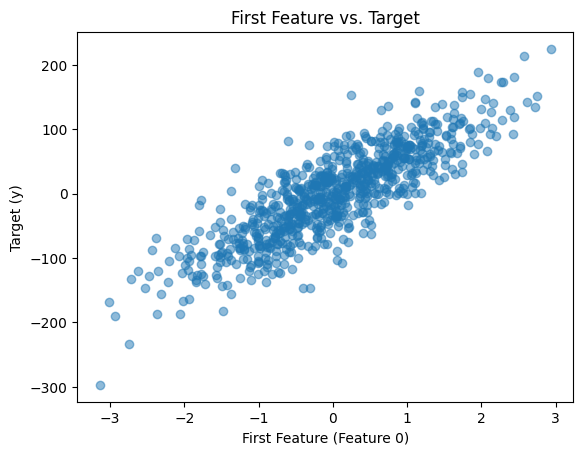

In [33]:
# TODO: Visualize your data points (first feature only)
plt.scatter(X_fit[:, 0], y_fit, alpha=0.5)
plt.xlabel('First Feature (Feature 0)')
plt.ylabel('Target (y)')
plt.title('First Feature vs. Target')
plt.show()

Train your model and  evaluate your model using MMSE, $R^2$ criterions, how well is your model trained?

In [34]:
def mse(y, predictions):
    return np.mean((y - predictions) ** 2)

Train MSE: 101.14
Train R²: 0.9800


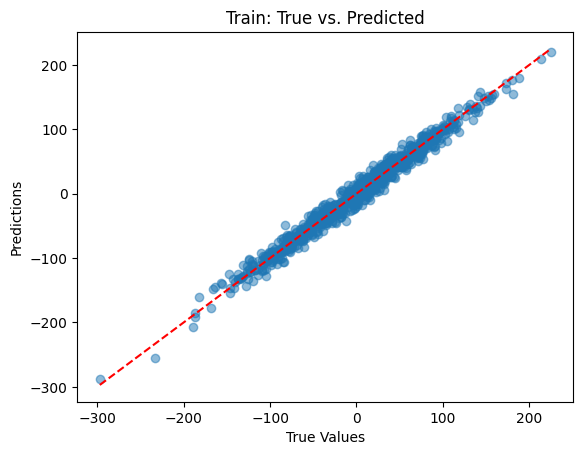

In [35]:
#TODO: train your model and make predictions
model = LinearRegression(lr=0.01, n_iters=1000)
model.fit(X_fit, y_fit)  
train_predictions = model.predict(X_fit)

train_mse = mse(y_fit, train_predictions)
ss_total = np.sum((y_fit - np.mean(y_fit)) ** 2)
ss_residual = np.sum((y_fit - train_predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f"Train MSE: {train_mse:.2f}")
print(f"Train R²: {r2:.4f}")


plt.scatter(y_fit, train_predictions, alpha=0.5)
plt.plot([y_fit.min(), y_fit.max()], [y_fit.min(), y_fit.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Train: True vs. Predicted')
plt.show()

Test MSE: 77.92
Test R²: 0.9815


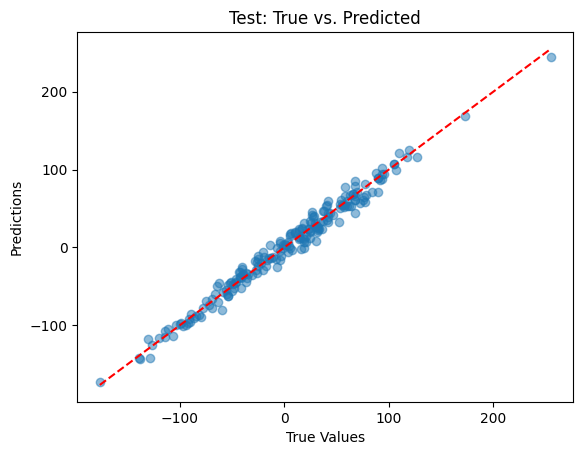

In [36]:
#TODO: make predictions using the model
y_pred_val = model.predict(X_val)


test_mse = mse(y_val, y_pred_val)
ss_total_test = np.sum((y_val - np.mean(y_val)) ** 2)
ss_residual_test = np.sum((y_val - y_pred_val) ** 2)
r2_test = 1 - (ss_residual_test / ss_total_test)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {r2_test:.4f}")

plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Test: True vs. Predicted')
plt.show()

### Ridge Regression:
Train your model using L2 regularization. Then change $\lambda$ and plot the train and test error with respect to $\lambda$. what is the best  $\lambda$?

Train MSE (λ=1.0): 101.15
Train R² (λ=1.0): 0.9800


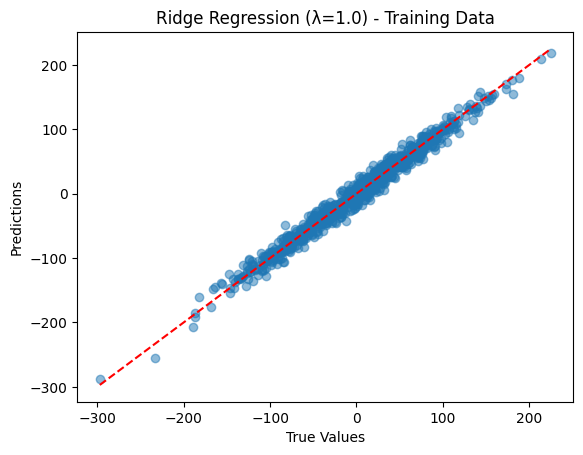

In [37]:
#TODO: train your model and make predictions
lambda_val = 1.0 

model = LinearRegression(lr=0.01, n_iters=1000, penalty='l2', lambda_reg=lambda_val)
model.fit(X_fit, y_fit)  

train_predictions = model.predict(X_fit)

train_mse = mse(y_fit, train_predictions)
ss_total = np.sum((y_fit - np.mean(y_fit)) ** 2)
ss_residual = np.sum((y_fit - train_predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f"Train MSE (λ={lambda_val}): {train_mse:.2f}")
print(f"Train R² (λ={lambda_val}): {r2:.4f}")

plt.scatter(y_fit, train_predictions, alpha=0.5)
plt.plot([y_fit.min(), y_fit.max()], [y_fit.min(), y_fit.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression (λ={lambda_val}) - Training Data')
plt.show()

Best Lambda: 1.5264


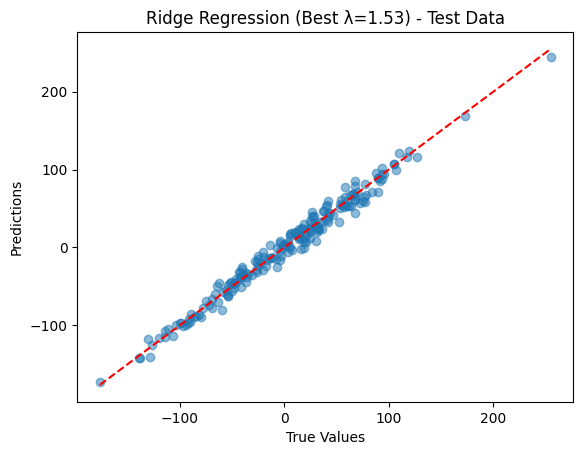

Test MSE at Best Lambda: 77.90
Test R² at Best Lambda: 0.9815


In [38]:
#TODO: Find best lambda and plot test predictions
import numpy as np


lambdas = np.logspace(-3, 3, 50)
train_mses = []
test_mses = []

for lambda_val in lambdas:
    model = LinearRegression(lr=0.01, n_iters=1000, penalty='l2', lambda_reg=lambda_val)
    model.fit(X_fit, y_fit)
    
    train_pred = model.predict(X_fit)
    test_pred = model.predict(X_val)
    
    train_mses.append(mse(y_fit, train_pred))
    test_mses.append(mse(y_val, test_pred))

best_lambda = lambdas[np.argmin(test_mses)]
print(f"Best Lambda: {best_lambda:.4f}")

best_model = LinearRegression(lr=0.01, n_iters=1000, penalty='l2', lambda_reg=best_lambda)
best_model.fit(X_fit, y_fit)
test_predictions = best_model.predict(X_val)

plt.scatter(y_val, test_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression (Best λ={best_lambda:.2f}) - Test Data')
plt.show()

test_mse = mse(y_val, test_predictions)
ss_total = np.sum((y_val - np.mean(y_val)) ** 2)
ss_residual = np.sum((y_val - test_predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f"Test MSE at Best Lambda: {test_mse:.2f}")
print(f"Test R² at Best Lambda: {r2:.4f}")

### Lasso Regression:
This time train your model using L1 regularization. Then change $\lambda$ and plot the train and test error with respect to $\lambda$. what is the best  $\lambda$?

repeat the things you did in the previous part for Lasso Regression.

Train MSE (λ=0.1): 101.14
Train R² (λ=0.1): 0.9800


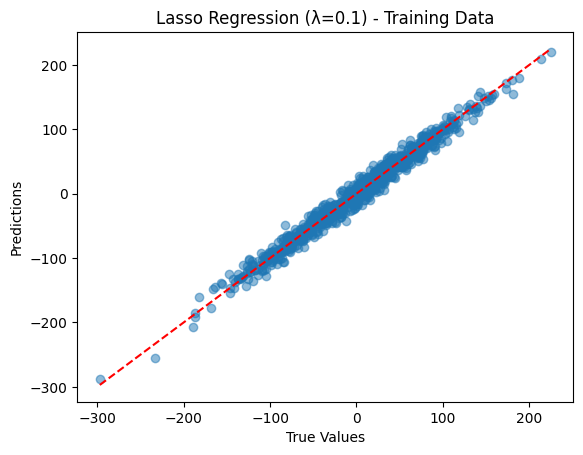

In [39]:
#TODO: Train Lasso Regression with λ=0.1
lambda_val = 0.1
model = LinearRegression(lr=0.01, n_iters=1000, penalty='l1', lambda_reg=lambda_val)
model.fit(X_fit, y_fit)

train_predictions = model.predict(X_fit)

train_mse = mse(y_fit, train_predictions)
ss_total = np.sum((y_fit - np.mean(y_fit)) ** 2)
ss_residual = np.sum((y_fit - train_predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f"Train MSE (λ={lambda_val}): {train_mse:.2f}")
print(f"Train R² (λ={lambda_val}): {r2:.4f}")

plt.scatter(y_fit, train_predictions, alpha=0.5)
plt.plot([y_fit.min(), y_fit.max()], [y_fit.min(), y_fit.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Lasso Regression (λ={lambda_val}) - Training Data')
plt.show()

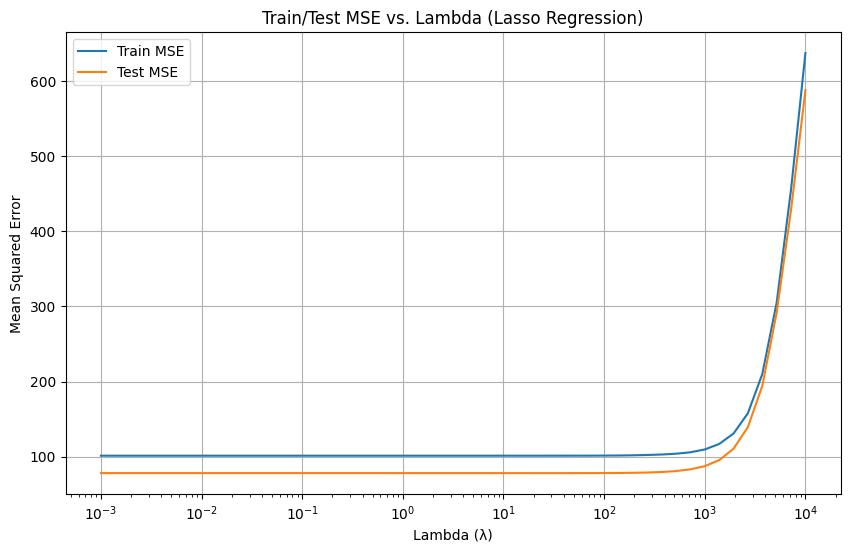

Best Lambda: 26.8270


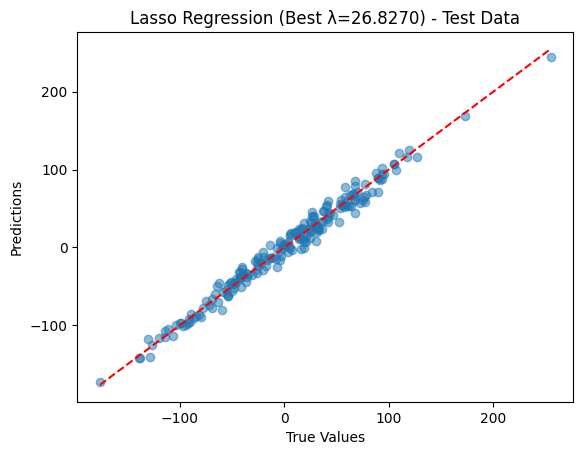

Test MSE (Best λ): 77.89
Test R² (Best λ): 0.9815


In [40]:
#TODO: Find best λ for Lasso
lambdas = np.logspace(-3, 4, 50)
train_mses = []
test_mses = []

for lambda_val in lambdas:
    model = LinearRegression(lr=0.01, n_iters=1000, penalty='l1', lambda_reg=lambda_val)
    model.fit(X_fit, y_fit)
    train_pred = model.predict(X_fit)
    test_pred = model.predict(X_val)
    train_mses.append(mse(y_fit, train_pred))
    test_mses.append(mse(y_val, test_pred))

# Plot MSE vs λ
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, train_mses, label='Train MSE')
plt.semilogx(lambdas, test_mses, label='Test MSE')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean Squared Error')
plt.title('Train/Test MSE vs. Lambda (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()


best_lambda = lambdas[np.argmin(test_mses)]
print(f"Best Lambda: {best_lambda:.4f}")


best_model = LinearRegression(lr=0.01, n_iters=1000, penalty='l1', lambda_reg=best_lambda)
best_model.fit(X_fit, y_fit)
test_predictions = best_model.predict(X_val)

plt.scatter(y_val, test_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Lasso Regression (Best λ={best_lambda:.4f}) - Test Data')
plt.show()

test_mse = mse(y_val, test_predictions)
ss_total = np.sum((y_val - np.mean(y_val)) ** 2)
ss_residual = np.sum((y_val - test_predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f"Test MSE (Best λ): {test_mse:.2f}")
print(f"Test R² (Best λ): {r2:.4f}")

# Q3: Logistic Regression
Logistic regression is used for a different class of problems known as classification problems. Here the aim is to predict the group to which the current object under observation belongs to. It gives you a discrete binary outcome between 0 and 1.

**How Does It Work?**

Logistic Regression measures the relationship between the dependent variable (our label, what we want to predict) and the one or more independent variables (our features), by estimating probabilities using its underlying logistic function.

### Key Features:
- **Binary Outcomes**: Logistic regression is suitable when the dependent variable is binary, such as yes/no or pass/fail.
- **Maximum Likelihood Estimation (MLE)**: Coefficients are estimated using MLE to maximize the likelihood of the observed data.
- **Interpretation**: The output can be interpreted as odds ratios, indicating how changes in independent variables affect the likelihood of an event.

### Types:
1. **Binary Logistic Regression**: Two possible outcomes.
2. **Multinomial Logistic Regression**: More than two categories.
3. **Ordinal Logistic Regression**: Ordered categories.

Logistic regression is widely used in fields like finance, healthcare, and social sciences for tasks such as risk assessment and disease diagnosis.

In this question we have a social network dataset. This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

### Importing Libraries

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

## Step 1 | Data Pre-Processing

### Loading the Dataset

In [38]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Step 2 | Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Step 3 | Predection and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = classifier.predict(X_test) 

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.89
Precision: 0.8888888888888888
Recall: 0.75
F1-Score: 0.8135593220338984


### Making the Confusion Matrix
We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. We will use confusion matrix which is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

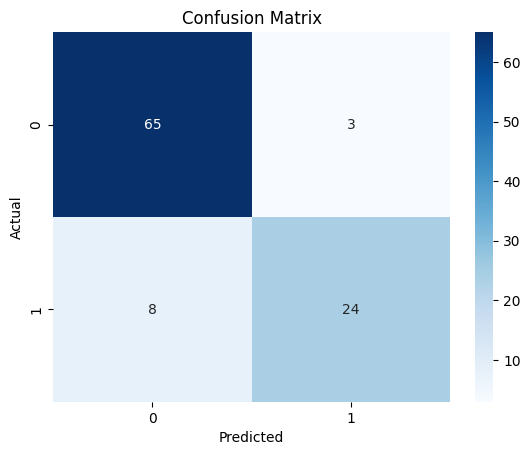

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#TODO: Draw the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Explain the confusion matrix and what insights we can derive from it?

A confusion matrix is a table that evaluates a classification model's performance by comparing predicted labels to actual outcomes, showing correct predictions (true positives/negatives) and errors (false positives/negatives). Matrix reveals: 65 users were correctly predicted not to buy (true negatives), 24 correctly predicted to buy (true positives), 3 non-buyers wrongly flagged as buyers (false positives), and 8 actual buyers missed (false negatives). This highlights a high-precision model (89%) that reliably identifies likely buyers but misses 25% of true buyers (lower recall), suggesting it prioritizes minimizing false alarms over capturing all potential customers. Overall accuracy is strong (89%), but the trade-off between precision and recall indicates room for improvement if capturing every sale is critical.

### Visualization

In [ ]:
def plot_decision_boundary(X, y, model, set_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='RdYlBu')
    plt.title(f'Logistic Regression Decision Boundary ({set_name})')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.show()

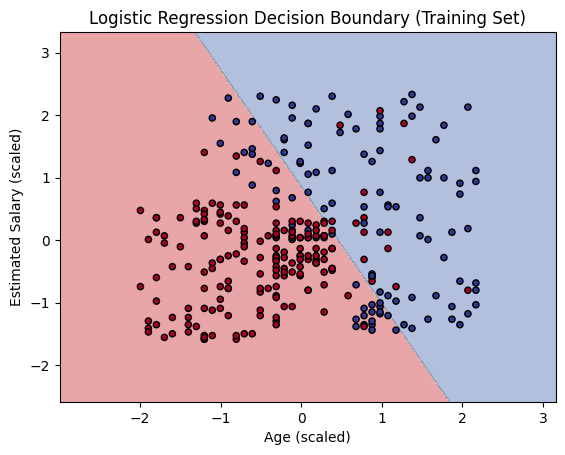

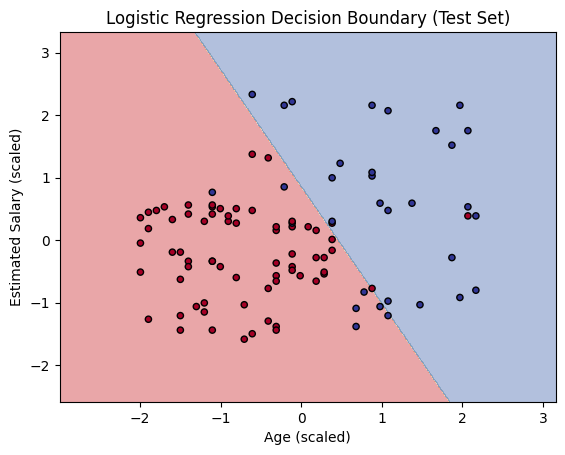

In [ ]:
plot_decision_boundary(X_train, y_train, classifier, "Training Set")
plot_decision_boundary(X_test, y_test, classifier, "Test Set")

## Step 4| MyLogisticRegression
Implement your own Logistic Regression model, and test it on the given dataset.

In [46]:

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, lambda_=0.0):
        self.lambda_ = lambda_
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y_true, y_pred):
        return (-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)).mean()

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear)
            
            # Gradient descent
            dw = (1 / n_samples) * (np.dot(X.T, (y_pred - y)) + self.lambda_ * self.weights)
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear)
        return (y_pred >= 0.5).astype(int)

 Test your model on the given dataset. Do not forget train-test split, then normalize your data . Finally, report 4 different evaluation metrics of the model on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)
y_pred_custom = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


Accuracy: 0.9
Precision: 0.9230769230769231
Recall: 0.75
F1-Score: 0.8275862068965517


 What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

Accuracy: Measures overall correctness. Useful when classes are balanced (e.g., spam vs. non-spam).

Precision: Focuses on minimizing false positives. Critical when false alarms are costly (e.g., medical diagnoses).

Recall: Focuses on minimizing false negatives. Vital when missing positives is risky (e.g., fraud detection).

F1-Score: Balances precision and recall. Ideal for imbalanced datasets (e.g., rare disease prediction).

Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

Scikit-learn’s LogisticRegression includes parameters like:

penalty (L1/L2 regularization) to prevent overfitting.

C (inverse regularization strength) to control model complexity.

solver (optimization algorithm) for efficiency on large datasets.

max_iter to limit iterations for convergence.
Performance: Scikit-learn’s implementation is optimized and supports regularization, while the custom model uses basic gradient descent and lacks advanced optimizations.

## Step 5| Further Visualization!
For different values of $\lambda$ (the regularization parameter), plot the decision boundary of your model (as you did in Step 3). Then, create a GIF showing how the decision boundary changes with $\lambda$.


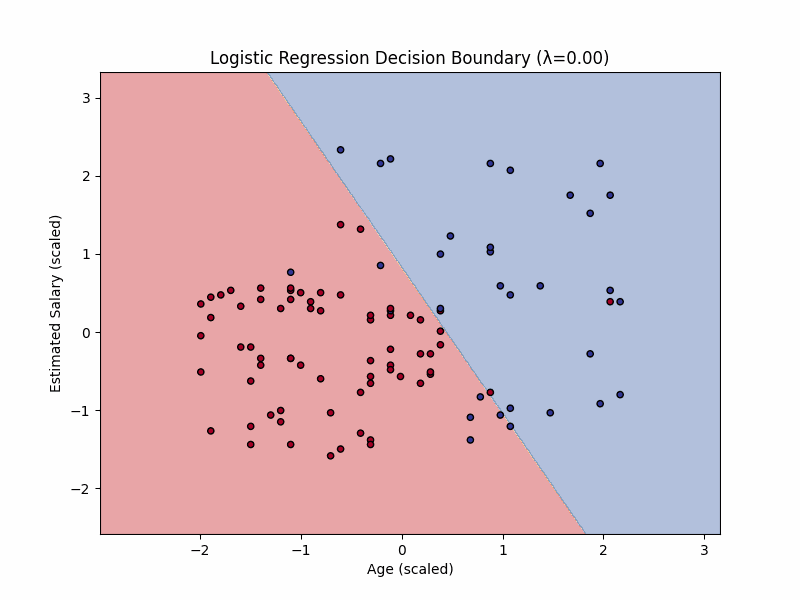

In [ ]:
import imageio.v2 as imageio
import os
import numpy as np
from IPython.display import Image

def plot_decision_boundary(X, y, model, set_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='RdYlBu')
    plt.title(f'Logistic Regression Decision Boundary ({set_name})')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
if not os.path.exists('lambda_plots'):
    os.makedirs('lambda_plots')


lambdas = np.logspace(-3, 3, 10) 

filenames = []

for i, lam in enumerate(lambdas):
    model = MyLogisticRegression(lambda_=lam, learning_rate=0.1, num_iterations=3000)
    model.fit(X_train_scaled, y_train)
    
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(X_test_scaled, y_test, model, f"λ={lam:.2f}")
    
    filename = f'lambda_plots/lambda_{i}.png'
    plt.savefig(filename)
    plt.close()
    filenames.append(filename)
images = []
for filename in filenames:
    images.append(imageio.imread(filename))

imageio.mimsave('decision_boundary.gif', images, duration=1.5)

for filename in filenames:
    os.remove(filename)
os.rmdir('lambda_plots')

Image(filename='decision_boundary.gif')
    

# Q4: Multinomial Logistic Regression
**Multinomial Logistic Regression** is a generalization of logistic regression that is used when the target variable has more than two categories or classes (i.e., the target is **categorical with more than two outcomes**). Unlike binary logistic regression, which predicts probabilities for two possible classes (0 or 1), multinomial logistic regression is used when there are **multiple categories** in the dependent variable.

#### Key Features:
1. **Categorical Dependent Variable:**
   Multinomial logistic regression is used when the dependent variable has more than two categories, and the classes are unordered (i.e., they do not have a natural order).

   Example:
   - Predicting the category of an email: Spam, Promotions, or Social.

2. **Model Explanation:**
   Multinomial logistic regression models the relationship between a set of independent variables (features) and a categorical dependent variable by using the **softmax function**. The model assigns probabilities to each class, and the sum of all the probabilities for each class is 1.

   The model predicts the probability of each class given the input features $ X $. The probability for class $ i $ for ($ i = 1, 2, ..., K $) is given by:

   $
   P(y = i | X) = \frac{e^{\theta_i^T X}}{ \sum_{k=1}^{K} e^{\theta_k^T X} }
   $

   where:
   - $ \theta_i $ is the vector of parameters for class $ i $.
   - $ K $ is the total number of classes.
   - $ X $ is the feature vector for a given observation.

3. **Comparison to Binary Logistic Regression:**
   - In **binary logistic regression**, the goal is to classify an instance into one of two classes (0 or 1), and the model outputs a probability for one class (class 1). The probability of class 0 is simply $ 1 - P(y=1) $.
   - In **multinomial logistic regression**, the model is extended to predict the probability of multiple classes (i.e., class 1, class 2, ..., class K). The softmax function normalizes the outputs to ensure that the sum of probabilities across all classes is 1.


In general Multinomial logistic regression is a powerful technique for classification problems with more than two classes. By extending logistic regression with the softmax function, it provides a framework to estimate the probabilities for multiple classes and make predictions in multi-class scenarios.


**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
import numpy as np

class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, n_classes=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.n_classes = n_classes
        self.W = None  
        self.b = None  
    def _to_one_hot(self, y):
        y_one_hot = np.zeros((len(y), self.n_classes))
        y_one_hot[np.arange(len(y)), y] = 1
        return y_one_hot
    
    def _softmax(self, z):
        max_z = np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z - max_z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def loss(self, y_true, y_pred):
        m = y_pred.shape[0]
        epsilon = 1e-15 
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        log_likelihood = -np.log(y_pred[np.arange(m), y_true])
        return np.mean(log_likelihood)
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).astype(int)
        
        if self.n_classes is None:
            self.n_classes = len(np.unique(y))
        
        n_samples, n_features = X.shape
        
        if self.W is None:
            np.random.seed(42)
            self.W = np.random.randn(n_features, self.n_classes) * 0.01
            self.b = np.zeros(self.n_classes)
        
        y_one_hot = self._to_one_hot(y)
        
        for _ in range(self.num_iterations):
            logits = X.dot(self.W) + self.b
            probabilities = self._softmax(logits)
            
            dW = (X.T.dot(probabilities - y_one_hot)) / n_samples
            db = np.sum(probabilities - y_one_hot, axis=0) / n_samples
            
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
    
    def predict(self, X):
        X = np.array(X)
        logits = X.dot(self.W) + self.b
        probabilities = self._softmax(logits)
        return np.argmax(probabilities, axis=1)

**Task:** Test your model on `Logistic_question.csv` dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

Do not forget train-test split and scaling your data! Apply a 0.2 train-test split.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('Logistic_question.csv')

results = []

for i in range(2, 11):
    y = pd.qcut(df['Target'], q=i, labels=False, duplicates='drop').astype(int)
    unique_classes = np.unique(y)
    if len(unique_classes) != i:
        print(f"Skipping i={i} as only {len(unique_classes)} classes were created.")
        continue
    
    X = df.drop('Target', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = MyMultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, n_classes=i)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results.append({
        'Number of Classes': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df

,Number of Classes,Accuracy,Precision,Recall,F1 Score
0,2,0.9375,0.937892,0.9375,0.937549
1,3,0.8500,0.846667,0.8500,0.847700
2,4,0.7125,0.737485,0.7125,0.720941
3,5,0.6625,0.700703,0.6625,0.667957
4,6,0.6000,0.596131,0.6000,0.595762
5,7,0.5250,0.533507,0.5250,0.526738
6,8,0.4500,0.441704,0.4500,0.437917
7,9,0.4375,0.437431,0.4375,0.425598
8,10,0.3375,0.377440,0.3375,0.325718


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

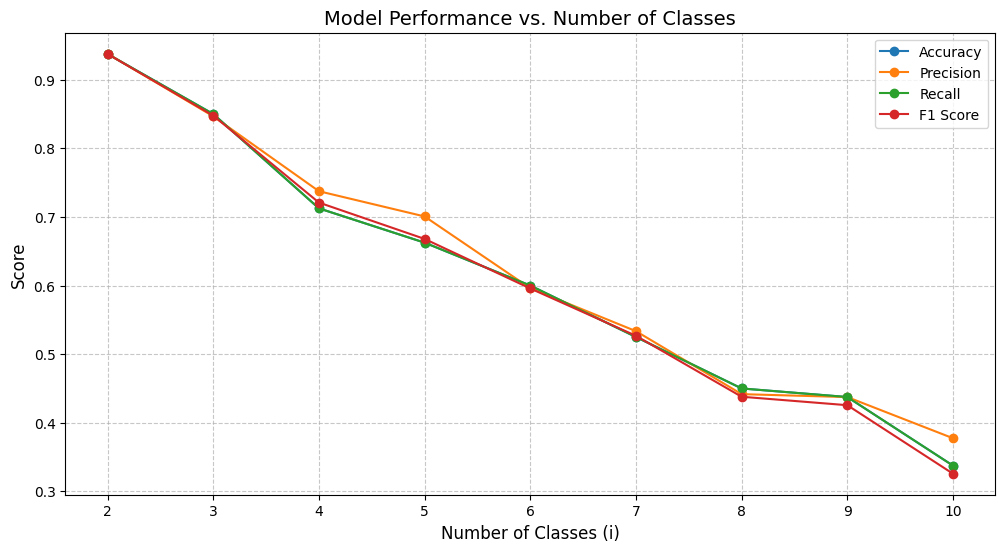

Best performance at i = 2 (F1 Score: 0.938)

Analysis:
   Number of Classes  Accuracy  Precision  Recall  F1 Score
0                  2     0.938      0.938   0.938     0.938
1                  3     0.850      0.847   0.850     0.848
2                  4     0.712      0.737   0.712     0.721
3                  5     0.662      0.701   0.662     0.668
4                  6     0.600      0.596   0.600     0.596
5                  7     0.525      0.534   0.525     0.527
6                  8     0.450      0.442   0.450     0.438
7                  9     0.438      0.437   0.438     0.426
8                 10     0.338      0.377   0.338     0.326


In [ ]:
# TODO: Analyze results and visualize metrics
import matplotlib.pyplot as plt
import seaborn as sns

best_idx = results_df['F1 Score'].idxmax()
best_i = results_df.loc[best_idx, 'Number of Classes']

plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.plot(results_df['Number of Classes'], results_df[metric], marker='o', label=metric)

plt.title('Model Performance vs. Number of Classes', fontsize=14)
plt.xlabel('Number of Classes (i)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(range(2, 11))
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print(f"Best performance at i = {best_i} (F1 Score: {results_df.loc[best_idx, 'F1 Score']:.3f})")
print("\nAnalysis:")
print(results_df.round(3))